## Sales Customer Analysis

**source of the "sales.csv" data set by @mitcholsmo: https://data.world/mitcholsmo/supermarket-sales/workspace/file?filename=sales.csv**  

The data set provided contains 1000 sales records from 3 supermarket outlets on a given day. The features provided are total (amount customer have to pay after discount), discount (discount amount given to customer), quantity (number of items customer bought), bags(number of plastic bag given to customer), rating( customer rating after payment), staff(number of staff at the supermarket), outlet (outlet of supermarket), gender (gender of customer), payment(payment method of customer)

-------------

#### import libraries

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

-------------

#### load data set

In [12]:
df = pd.read_csv("sales.csv", delimiter=",")

In [22]:
df.head()

,total,discount,quantity,bags,rating,staff,outlet,gender,payment
0,103.25,99,12,6,4,5,A,Female,Credit
1,60.65,59,6,0,4,3,C,Female,Cash
2,88.58,44,8,7,3,7,A,Male,Cash
3,92.30,98,8,3,5,3,A,Male,Credit
4,75.88,76,8,3,4,5,A,Male,Cash


---------------

#### gather important information

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total       1000 non-null   float64
 1    discount   1000 non-null   int64  
 2   quantity    1000 non-null   int64  
 3   bags        1000 non-null   int64  
 4   rating      1000 non-null   int64  
 5   staff       1000 non-null   int64  
 6   outlet      1000 non-null   object 
 7   gender      1000 non-null   object 
 8   payment     1000 non-null   object 
dtypes: float64(1), int64(5), object(3)
memory usage: 70.4+ KB


In [131]:
#mean/median/standard deviation values for the whole data set according to given ratings by customers
mean_all = df["rating"].mean()
median_all = df["rating"].median()
std_all = df["rating"].std()

print(mean_all)
print(median_all)
print(std_all)

3.435
3.0
0.917942055697204


In [153]:
gender_all_female = df[df['gender'] == "Female"]
print(gender_all_female.head())

print("\nRatings by all females:")

mean_all_gender_female = gender_all_female["rating"].mean()
median_all_gender_female = gender_all_female["rating"].median()
std_all_gender_female = gender_all_female["rating"].std()

print(mean_all_gender_female)
print(median_all_gender_female)
print(std_all_gender_female)

print("\nDifferences to the values of the main table (for both genders):")

#differences to the whole values
print((mean_all_gender_female-mean_all))
print((median_all_gender_female-median_all))
print((std_all_gender_female-std_all))

    total   discount   quantity  bags  rating  staff outlet  gender payment
0  103.25          99        12     6       4      5      A  Female  Credit
1   60.65          59         6     0       4      3      C  Female    Cash
6   70.33          70         6     0       3      3      A  Female    Cash
7   87.32          40        10     2       2      5      C  Female  Credit
8  124.31          89        13     6       4      3      A  Female    Cash

Ratings by all females:
3.499001996007984
4.0
0.9002771806482723

Differences to the values of the main table (for both genders):
0.06400199600798384
1.0
-0.01766487504893166


In [155]:
gender_all_male = df[df['gender'] == "Male"]
print(gender_all_male.head())

print("\nRatings by all males:")

mean_all_gender_male = gender_all_male["rating"].mean()
median_all_gender_male = gender_all_male["rating"].median()
std_all_gender_male = gender_all_male["rating"].std()

print(mean_all_gender_male)
print(median_all_gender_male)
print(std_all_gender_male)

print("\nDifferences to the values of the main table (for both genders):")

#differences to the whole values
print((mean_all_gender_male-mean_all))
print((median_all_gender_male-median_all))
print((std_all_gender_male-std_all))

    total   discount   quantity  bags  rating  staff outlet gender payment
2   88.58          44         8     7       3      7      A   Male    Cash
3   92.30          98         8     3       5      3      A   Male  Credit
4   75.88          76         8     3       4      5      A   Male    Cash
5   95.05          74         9     4       3      6      C   Male  Credit
11  80.56          43         8     2       2      4      B   Male  Credit

Ratings by all males:
3.370741482965932
3.0
0.9318255452011189

Differences to the values of the main table (for both genders):
-0.06425851703406815
0.0
0.013883489503914936


In [157]:
print("Differences between males and females (males minus females) according to their rating:")

print(mean_all_gender_male-mean_all_gender_female)
print(median_all_gender_male-median_all_gender_female)
print(std_all_gender_male-std_all_gender_female)

Differences between males and females (males minus females) according to their rating:
-0.128260513042052
-1.0
0.0315483645528466


gender
Female    501
Male      499
Name: count, dtype: int64


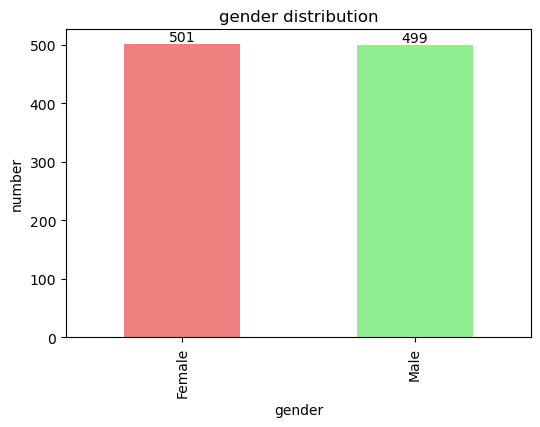

In [75]:
total_gender = df["gender"].value_counts()
print(total_gender)


#plot the gender distribution
plt.figure(figsize=(6, 4))
barplot = total_gender.plot(kind="bar", color=["lightcoral", "lightgreen"])

plt.title("gender distribution")
plt.xlabel("gender")
plt.ylabel("number")

#show values at the top of the bar plots
for p in barplot.patches:
    barplot.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.show()

payment
Credit    524
Cash      476
Name: count, dtype: int64


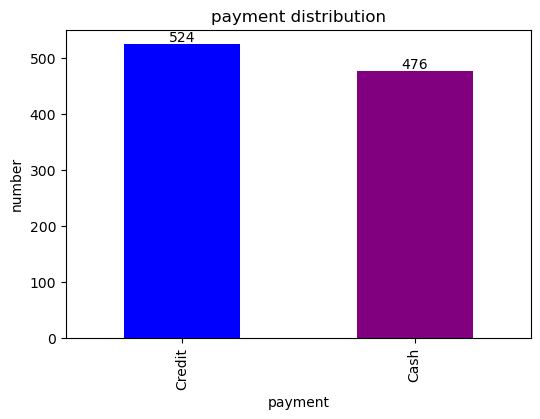

In [79]:
total_payment = df["payment"].value_counts()
print(total_payment)

#plot the payment distribution
plt.figure(figsize=(6, 4))
barplot = total_payment.plot(kind="bar", color=["blue", "purple"])

plt.title("payment distribution")
plt.xlabel("payment")
plt.ylabel("number")

#show values at the top of the bar plots
for p in barplot.patches:
    barplot.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.show()

outlet
A    340
B    332
C    328
Name: count, dtype: int64


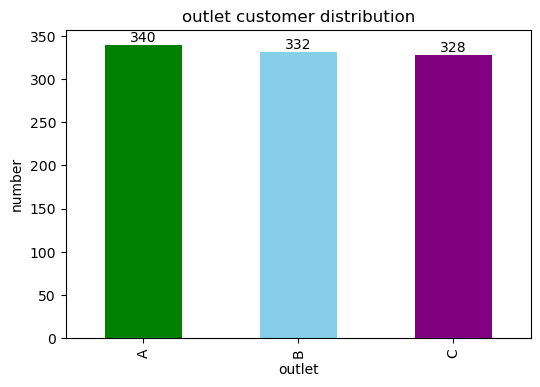

In [107]:
total_outlet = df["outlet"].value_counts()
print(total_outlet)

#plot the payment distribution
plt.figure(figsize=(6, 4))
barplot = total_outlet.plot(kind="bar", color=["green", "skyblue", "purple"])

plt.title("outlet customer distribution")
plt.xlabel("outlet")
plt.ylabel("number")

#show values at the top of the bar plots
for p in barplot.patches:
    barplot.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.show()

-------------------

#### useful statistics about every single outlet

##### Outlet A

In [116]:
outlet_a = df[df['outlet'] == "A"]
display(outlet_a)

,total,discount,quantity,bags,rating,staff,outlet,gender,payment
0,103.25,99,12,6,4,5,A,Female,Credit
2,88.58,44,8,7,3,7,A,Male,Cash
3,92.30,98,8,3,5,3,A,Male,Credit
4,75.88,76,8,3,4,5,A,Male,Cash
6,70.33,70,6,0,3,3,A,Female,Cash
...,...,...,...,...,...,...,...,...,...
990,77.83,53,7,0,3,7,A,Female,Credit
992,51.57,23,8,0,2,3,A,Male,Credit
997,100.76,63,10,3,3,4,A,Male,Cash
998,100.69,92,9,7,4,7,A,Male,Credit


gender
Male      179
Female    161
Name: count, dtype: int64


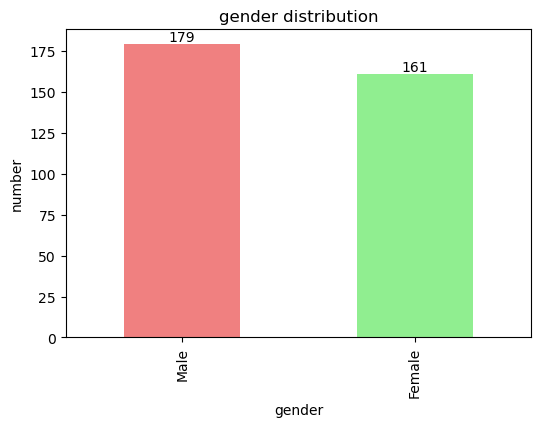

In [118]:
total_gender_a = outlet_a["gender"].value_counts()
print(total_gender_a)


#plot the gender distribution
plt.figure(figsize=(6, 4))
barplot = total_gender_a.plot(kind="bar", color=["lightcoral", "lightgreen"])

plt.title("gender distribution")
plt.xlabel("gender")
plt.ylabel("number")

#show values at the top of the bar plots
for p in barplot.patches:
    barplot.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.show()

payment
Credit    176
Cash      164
Name: count, dtype: int64


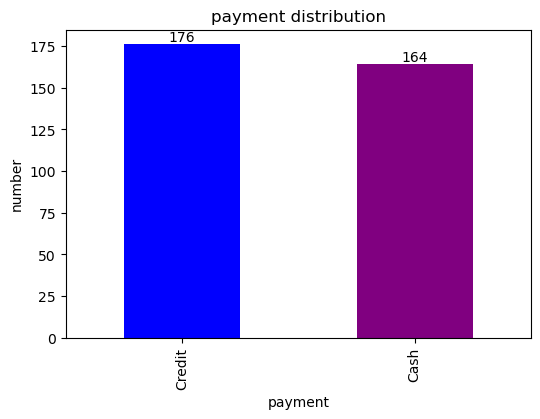

In [125]:
total_payment_a = outlet_a["payment"].value_counts()
print(total_payment_a)

#plot the payment distribution
plt.figure(figsize=(6, 4))
barplot = total_payment_a.plot(kind="bar", color=["blue", "purple"])

plt.title("payment distribution")
plt.xlabel("payment")
plt.ylabel("number")

#show values at the top of the bar plots
for p in barplot.patches:
    barplot.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.show()

rating
4    133
3    112
5     45
2     45
1      3
6      2
Name: count, dtype: int64


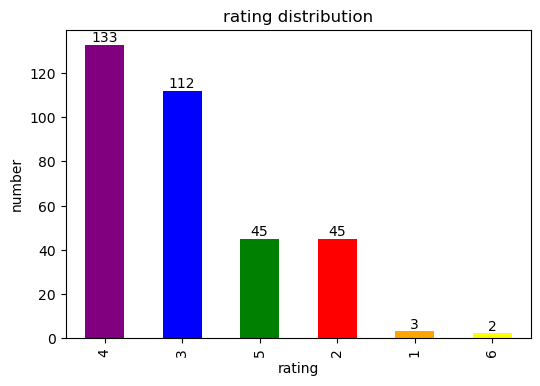

In [187]:
total_ratings_a = outlet_a["rating"].value_counts()
print(total_ratings_a)

#plot the payment distribution
plt.figure(figsize=(6, 4))
barplot = total_ratings_a.plot(kind="bar", color=["purple", "blue", "green", "red", "orange", "yellow"])

plt.title("rating distribution")
plt.xlabel("rating")
plt.ylabel("number")

#show values at the top of the bar plots
for p in barplot.patches:
    barplot.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.show()

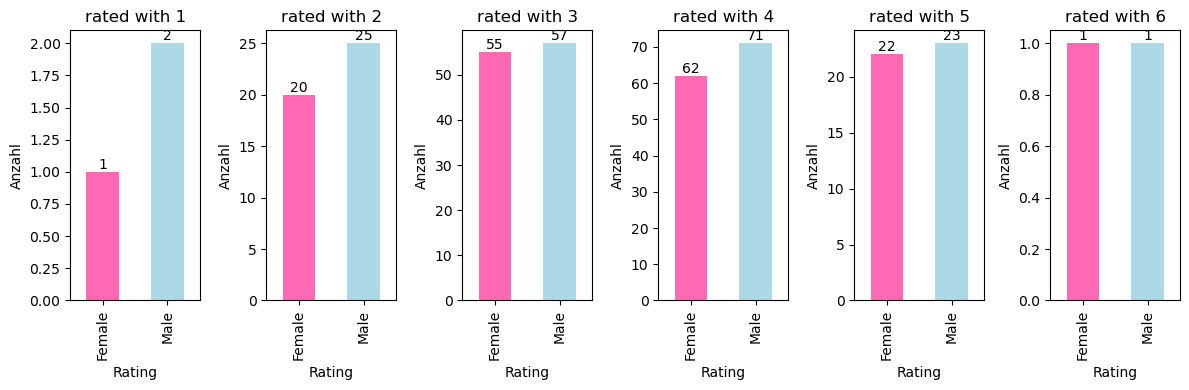

In [195]:
#group by gender and rating
grouped_ratings = outlet_a.groupby("gender")["rating"].value_counts().unstack()

#create plot for both genders
fig, axes = plt.subplots(1, len(grouped_ratings.columns), figsize=(12, 4))  #1 line, number of columns equals the number of genders

for i, gender in enumerate(grouped_ratings.columns):
    barplot = grouped_ratings[gender].plot(kind="bar", ax=axes[i], color=["hotpink", "lightblue"])

    axes[i].set_title(f"rated with {gender}")
    axes[i].set_xlabel("Rating")
    axes[i].set_ylabel("Anzahl")

    #show values on top of bar plots
    for p in barplot.patches:
        barplot.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')

plt.tight_layout() #separate plots
plt.show()

##### Outlet B

In [116]:
outlet_b = df[df['outlet'] == "B"]
display(outlet_b)

,total,discount,quantity,bags,rating,staff,outlet,gender,payment
0,103.25,99,12,6,4,5,A,Female,Credit
2,88.58,44,8,7,3,7,A,Male,Cash
3,92.30,98,8,3,5,3,A,Male,Credit
4,75.88,76,8,3,4,5,A,Male,Cash
6,70.33,70,6,0,3,3,A,Female,Cash
...,...,...,...,...,...,...,...,...,...
990,77.83,53,7,0,3,7,A,Female,Credit
992,51.57,23,8,0,2,3,A,Male,Credit
997,100.76,63,10,3,3,4,A,Male,Cash
998,100.69,92,9,7,4,7,A,Male,Credit


gender
Male      179
Female    161
Name: count, dtype: int64


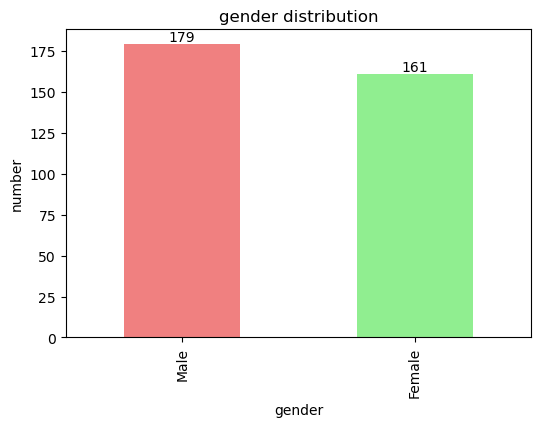

In [118]:
total_gender_b = outlet_b["gender"].value_counts()
print(total_gender_b)


#plot the gender distribution
plt.figure(figsize=(6, 4))
barplot = total_gender_b.plot(kind="bar", color=["lightcoral", "lightgreen"])

plt.title("gender distribution")
plt.xlabel("gender")
plt.ylabel("number")

#show values at the top of the bar plots
for p in barplot.patches:
    barplot.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.show()

payment
Credit    176
Cash      164
Name: count, dtype: int64


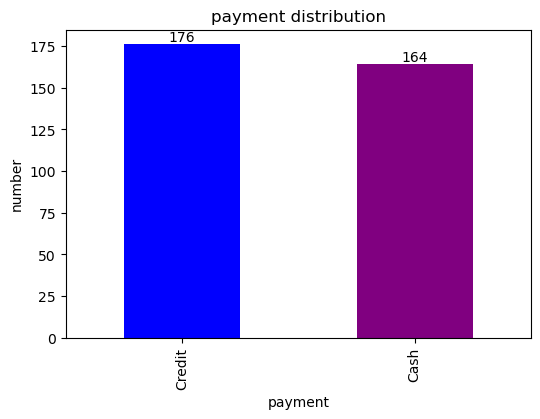

In [125]:
total_payment_b = outlet_b["payment"].value_counts()
print(total_payment_b)

#plot the payment distribution
plt.figure(figsize=(6, 4))
barplot = total_payment_b.plot(kind="bar", color=["blue", "purple"])

plt.title("payment distribution")
plt.xlabel("payment")
plt.ylabel("number")

#show values at the top of the bar plots
for p in barplot.patches:
    barplot.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.show()

rating
4    133
3    112
5     45
2     45
1      3
6      2
Name: count, dtype: int64


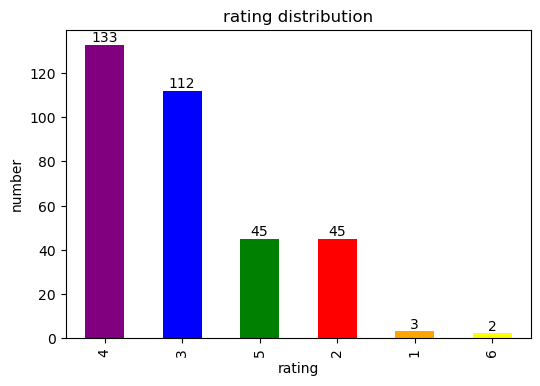

In [187]:
total_ratings_b = outlet_b["rating"].value_counts()
print(total_ratings_b)

#plot the payment distribution
plt.figure(figsize=(6, 4))
barplot = total_ratings_b.plot(kind="bar", color=["purple", "blue", "green", "red", "orange", "yellow"])

plt.title("rating distribution")
plt.xlabel("rating")
plt.ylabel("number")

#show values at the top of the bar plots
for p in barplot.patches:
    barplot.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.show()

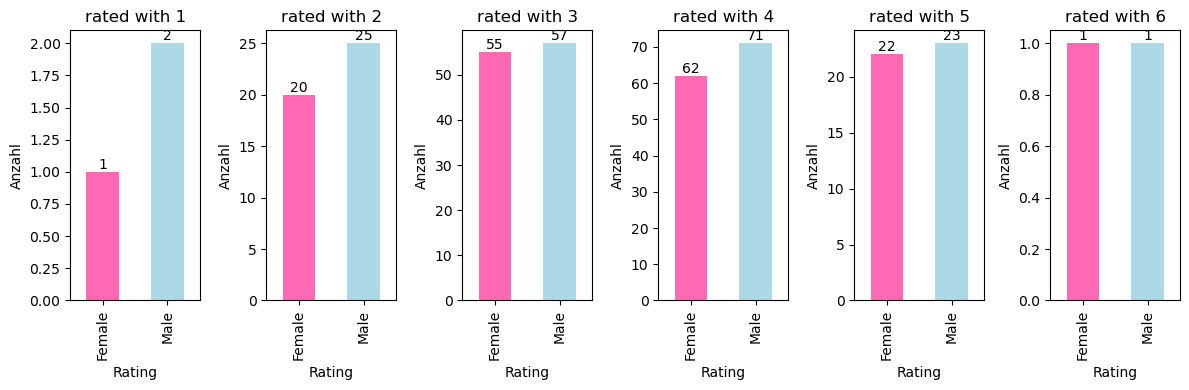

In [195]:
#group by gender and rating
grouped_ratings = outlet_b.groupby("gender")["rating"].value_counts().unstack()

#create plot for both genders
fig, axes = plt.subplots(1, len(grouped_ratings.columns), figsize=(12, 4))  #1 line, number of columns equals the number of genders

for i, gender in enumerate(grouped_ratings.columns):
    barplot = grouped_ratings[gender].plot(kind="bar", ax=axes[i], color=["hotpink", "lightblue"])

    axes[i].set_title(f"rated with {gender}")
    axes[i].set_xlabel("Rating")
    axes[i].set_ylabel("Anzahl")

    #show values on top of bar plots
    for p in barplot.patches:
        barplot.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')

plt.tight_layout() #separate plots
plt.show()

##### Outlet C

In [116]:
outlet_c = df[df['outlet'] == "C"]
display(outlet_c)

,total,discount,quantity,bags,rating,staff,outlet,gender,payment
0,103.25,99,12,6,4,5,A,Female,Credit
2,88.58,44,8,7,3,7,A,Male,Cash
3,92.30,98,8,3,5,3,A,Male,Credit
4,75.88,76,8,3,4,5,A,Male,Cash
6,70.33,70,6,0,3,3,A,Female,Cash
...,...,...,...,...,...,...,...,...,...
990,77.83,53,7,0,3,7,A,Female,Credit
992,51.57,23,8,0,2,3,A,Male,Credit
997,100.76,63,10,3,3,4,A,Male,Cash
998,100.69,92,9,7,4,7,A,Male,Credit


gender
Male      179
Female    161
Name: count, dtype: int64


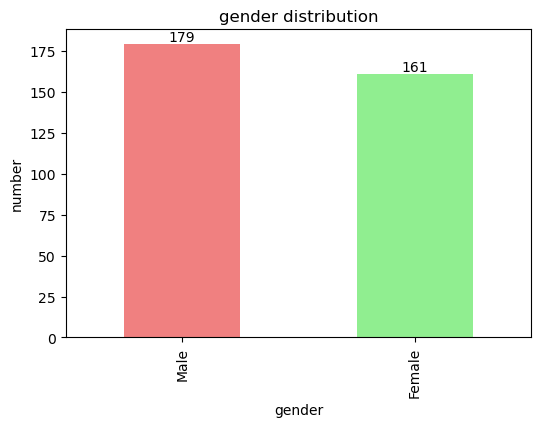

In [118]:
total_gender_c = outlet_c["gender"].value_counts()
print(total_gender_c)


#plot the gender distribution
plt.figure(figsize=(6, 4))
barplot = total_gender_c.plot(kind="bar", color=["lightcoral", "lightgreen"])

plt.title("gender distribution")
plt.xlabel("gender")
plt.ylabel("number")

#show values at the top of the bar plots
for p in barplot.patches:
    barplot.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.show()

payment
Credit    176
Cash      164
Name: count, dtype: int64


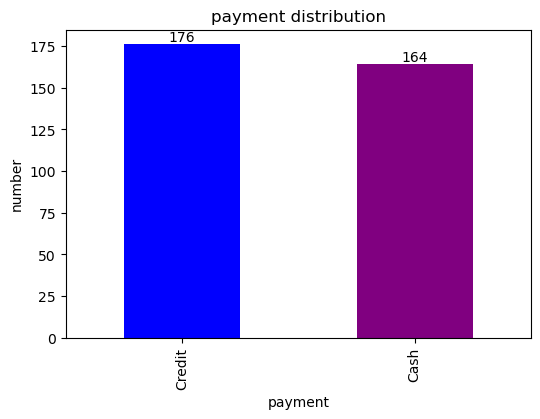

In [125]:
total_payment_c = outlet_c["payment"].value_counts()
print(total_payment_c)

#plot the payment distribution
plt.figure(figsize=(6, 4))
barplot = total_payment_c.plot(kind="bar", color=["blue", "purple"])

plt.title("payment distribution")
plt.xlabel("payment")
plt.ylabel("number")

#show values at the top of the bar plots
for p in barplot.patches:
    barplot.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.show()

rating
4    133
3    112
5     45
2     45
1      3
6      2
Name: count, dtype: int64


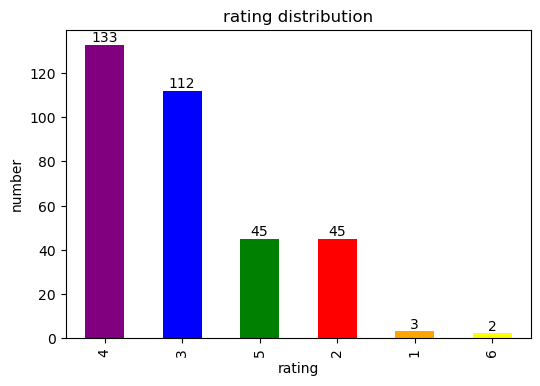

In [187]:
total_ratings_c = outlet_c["rating"].value_counts()
print(total_ratings_c)

#plot the payment distribution
plt.figure(figsize=(6, 4))
barplot = total_ratings_c.plot(kind="bar", color=["purple", "blue", "green", "red", "orange", "yellow"])

plt.title("rating distribution")
plt.xlabel("rating")
plt.ylabel("number")

#show values at the top of the bar plots
for p in barplot.patches:
    barplot.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.show()

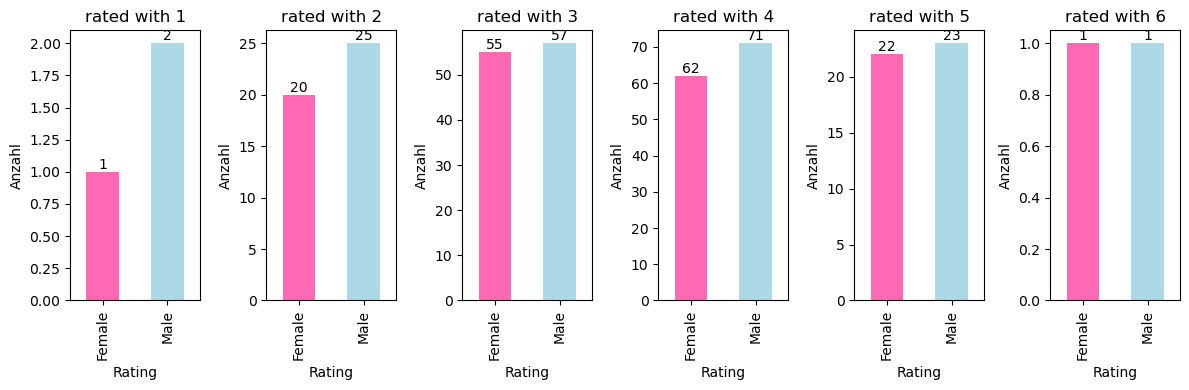

In [195]:
#group by gender and rating
grouped_ratings = outlet_c.groupby("gender")["rating"].value_counts().unstack()

#create plot for both genders
fig, axes = plt.subplots(1, len(grouped_ratings.columns), figsize=(12, 4))  #1 line, number of columns equals the number of genders

for i, gender in enumerate(grouped_ratings.columns):
    barplot = grouped_ratings[gender].plot(kind="bar", ax=axes[i], color=["hotpink", "lightblue"])

    axes[i].set_title(f"rated with {gender}")
    axes[i].set_xlabel("Rating")
    axes[i].set_ylabel("Anzahl")

    #show values on top of bar plots
    for p in barplot.patches:
        barplot.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')

plt.tight_layout() #separate plots
plt.show()